<center><h1>Leveraging Machine Learning Approaches for Lung Disease Diagnosis</h1></center>

<div>
    <h4>Table of Contents</h4>
    <ol style="list-style-type:upper-roman;">
        <li>
            <a href="#chapter-1-exploratory-data-analysis">Task 1: EXPLORATORY DATA ANALYSIS</a>
            <ol>
                <li><a href="#target-variable-analysis">TARGET VARIABLE ANALYSIS</a></li>
                <li><a href="#statistical-summary">STATISTICAL SUMMARY</a></li>
                <li>
                    <a href="#histogram-and-box-plot-visualizations">HISTOGRAM AND BOX PLOT VISUALIZATIONS</a>
                </li>
                <li><a href="#correlation-results-with-target-variable">CORRELATION RESULTS WITH TARGET VARIABLE:</a></li>
            </ol>
        </li>
        <li>
            <a href="#chapter-2-data-preparation">Task 2 DATA PREPARATION</a>
            <ol>
                <li><a href="#missing-values-inspection">MISSING VALUES INSPECTION:</a></li>
                <li><a href="#encoding-methods">ENCODING METHODS:</a></li>
                <li><a href="#feature-scaling">FEATURE SCALING:</a></li>
                <li>
                    <a href="#before-and-after-scaling-visualizations">BEFORE AND AFTER SCALING VISUALIZATIONS:</a>
                    <ol style="list-style-type: decimal;">
                        <li><a href="#skewed-features">Skewed features :</a></li>
                        <li><a href="#symmetric-features">Symmetric features :</a></li>
                    </ol>
                </li>
            </ol>
        </li>
        <li>
            <a href="#chapter-3-model-training">Task 3 MODEL TRAINING</a>
            <ol>
                <li><a href="#train-test-split-strategy">TRAIN-TEST SPLIT STRATEGY:</a></li>
                <li><a href="#classification-algorithms-and-relation-to-the-datasets">CLASSIFICATION ALGORITHMS AND RELATION TO THE DATASETS :</a></li>
            </ol>
        </li>
        <li>
            <a href="#chapter-4-model-evaluation-and-visualization">Task 4 MODEL EVALUATION AND VISUALIZATION:</a>
            <ol>
                <li>
                    <a href="#model-evaluation">MODEL EVALUATION:</a>
                    <ol style="list-style-type: decimal;">
                        <li><a href="#performance-metrics">Performance metrics:</a></li>
                        <li><a href="#confusion-matrix">Confusion Matrix:</a></li>
                        <li><a href="#multiclass-roc-curves">Multiclass Roc curves:</a></li>
                    </ol>
                </li>
                <li><a href="#model-performance-after-tuning">MODEL PERFORMANCE AFTER TUNING</a></li>
                <li><a href="#feature-important-shap-method">FEATURE IMPORTANT SHAP METHOD:</a></li>
            </ol>
        </li>
    </ol>
</div>



<a id="chapter-1-exploratory-data-analysis"></a>
<h4>Task 1: EXPLORATORY DATA ANALYSIS</h4>

In [1]:
from IPython.display import display, Markdown, HTML
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
import dataframe_image as dfi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, roc_auc_score)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import shap

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [2]:
df = pd.read_csv('Lung_disease-main/Lung_disease-main/lung_disease_v1.csv')

summary = {'shape of the dataset': [df.shape],
           'Number of samples': [len(df)],
           'Number of features': [len(df.columns)]}

display(Markdown("**Dataset summary:**"))
df_summary = pd.DataFrame(summary).transpose()
df_summary.columns = ["General information"]
display(df_summary)


display(Markdown("**the first Five Rows:**"))
display(df.head())

display(Markdown("**Dataset Info:**"))
info = {
    'Column': df.columns,
    'Non-Null Count': [df[col].count() for col in df.columns],
    'Null Count': [df[col].isnull().sum() for col in df.columns],
    'Dtype': [df[col].dtype for col in df.columns]}

df_info = pd.DataFrame(info)
display(df_info)  

**Dataset summary:**

,General information
shape of the dataset,"(12000, 33)"
Number of samples,12000
Number of features,33


**the first Five Rows:**

,patient_id,age,sex,bmi,smoking_status,pack_years,pm25_exposure,occupation,family_history,cough,...,dlco_pct_pred,cxr_finding,ct_nodule_size_mm,ct_emphysema_pct,sixmwd_m,hypertension,diabetes,hospital_visits_last_year,disease_type,severity
0,1,49,Male,20.1,Never,21.0,20.8,Office,NaN,1,...,82.1,Normal,3.0,11.9,447,1,1,0,Asthma,Moderate
1,2,61,Female,28.4,Current,34.1,10.8,Office,NaN,0,...,81.1,Normal,5.9,2.1,394,0,0,0,Lung Cancer,Mild/None
2,3,70,Male,22.2,Current,15.7,12.0,Manufacturing,NaN,1,...,85.4,Consolidation,2.8,4.8,309,0,1,0,Pneumonia,Mild/None
3,4,47,Male,23.1,Current,49.0,20.0,Manufacturing,NaN,0,...,49.0,Normal,1.8,29.4,190,0,0,0,COPD,Moderate
4,5,70,Female,29.0,Former,6.0,6.0,Office,NaN,0,...,81.6,Normal,1.0,9.5,314,0,0,0,Healthy,Mild/None


**Dataset Info:**

,Column,Non-Null Count,Null Count,Dtype
0,patient_id,12000,0,int64
1,age,12000,0,int64
2,sex,12000,0,object
3,bmi,12000,0,float64
4,smoking_status,12000,0,object
5,pack_years,12000,0,float64
6,pm25_exposure,12000,0,float64
7,occupation,12000,0,object
8,family_history,4824,7176,object
9,cough,12000,0,int64


<a id="target-variable-analysis"></a>
<h4>TARGET VARIABLE ANALYSIS</h4>

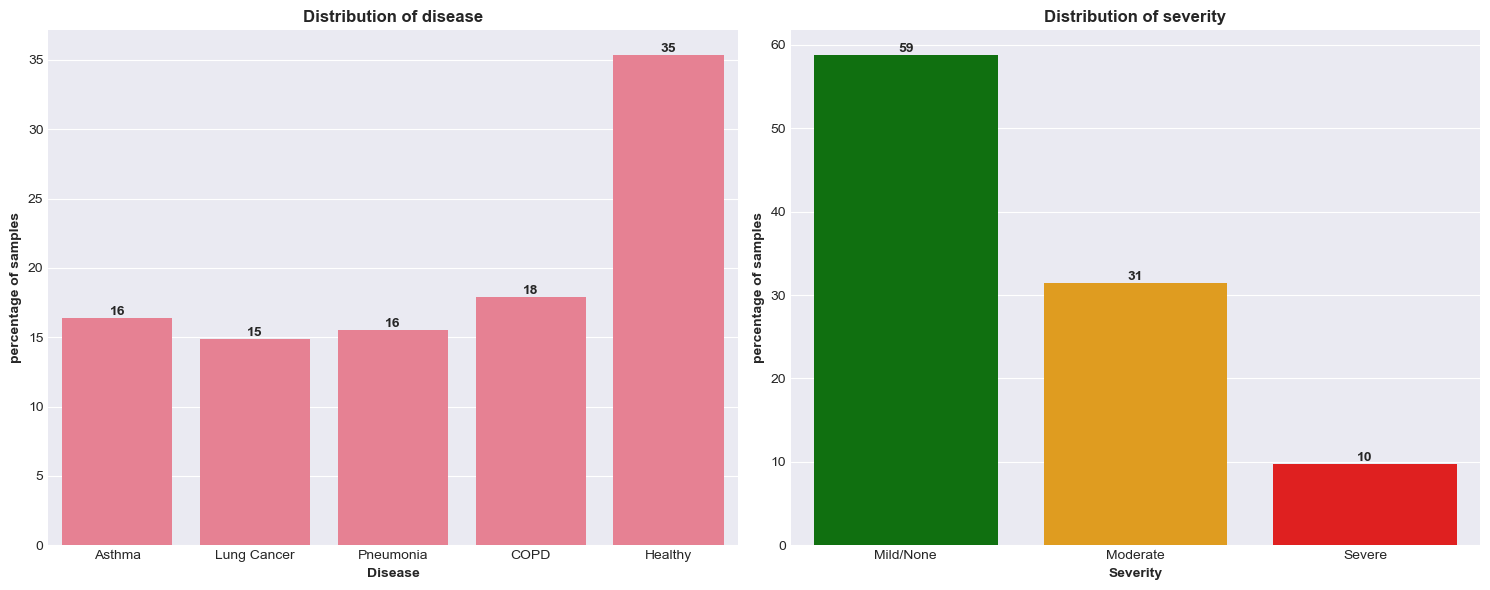

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot disease type
sns.countplot(data=df, x='disease_type', ax=axes[0], stat="percent")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.0f",weight='bold')
axes[0].set_title("Distribution of disease", fontweight="bold")

axes[0].set_xlabel('Disease', fontweight="bold")
axes[0].set_ylabel('percentage of samples', fontweight='bold')

# severity typeordinal data
sns.countplot(data= df, x='severity', ax=axes[1] ,stat="percent", order= ['Mild/None', 'Moderate', 'Severe'], palette= sns.color_palette(['green', 'orange', 'red']))
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f' ,weight='bold')
axes[1].set_title("Distribution of severity", fontweight='bold')
axes[1].set_xlabel('Severity', fontweight="bold")
axes[1].set_ylabel('percentage of samples', fontweight="bold")

#plt.savefig('images/task1_target_variable.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

<a id="statistical-summary"></a>
<h4>STATISTICAL SUMMARY</h4>

In [4]:
Numerical_features = ['age','bmi','pack_years' ,'pm25_exposure','weight_loss_kg','spo2', 'respiratory_rate', 'crp_mg_L', 'wbc_10e9_L',
    'fev1_fvc', 'fev1_pct_pred','fvc_pct_pred','dlco_pct_pred','ct_nodule_size_mm','ct_emphysema_pct','sixmwd_m','hospital_visits_last_year']
                      


desc_stats = df[Numerical_features].describe().transpose()

median_values = df[Numerical_features].median()
desc_stats.insert(2, 'median', median_values)
desc_stats['skewness'] = df[Numerical_features].skew()

final_stats = desc_stats.round(2)
display(Markdown("**Descriptive Statistics:**"))
display(final_stats)

#dfi.export(final_stats, "images/Task1_Descriptive_Statistics_table.png", table_conversion='matplotlib')


**Descriptive Statistics:**

,count,mean,median,std,min,25%,50%,75%,max,skewness
age,12000.0,58.07,58.00,14.74,18.00,48.00,58.00,68.00,90.00,-0.07
bmi,12000.0,27.01,27.00,4.96,16.00,23.50,27.00,30.40,45.60,0.08
pack_years,12000.0,14.77,10.30,14.85,0.00,2.70,10.30,22.80,81.80,1.16
pm25_exposure,12000.0,15.11,15.00,6.69,3.00,10.30,15.00,19.70,41.30,0.22
weight_loss_kg,12000.0,1.62,1.40,2.42,-5.00,0.00,1.40,3.00,13.30,0.50
spo2,12000.0,95.96,96.00,2.38,87.20,94.40,96.00,97.70,100.00,-0.27
respiratory_rate,12000.0,17.97,18.00,2.99,10.00,15.90,18.00,20.00,28.70,-0.00
crp_mg_L,12000.0,20.79,10.30,30.61,0.00,1.50,10.30,22.90,218.60,2.40
wbc_10e9_L,12000.0,8.10,7.80,2.61,2.00,6.30,7.80,9.50,20.70,0.69
fev1_fvc,12000.0,0.74,0.75,0.10,0.32,0.68,0.75,0.81,0.95,-0.40


<a id="histogram-and-box-plot-visualizations"></a>
<h4>HISTOGRAM AND BOX PLOT VISUALIZATIONS</h4>

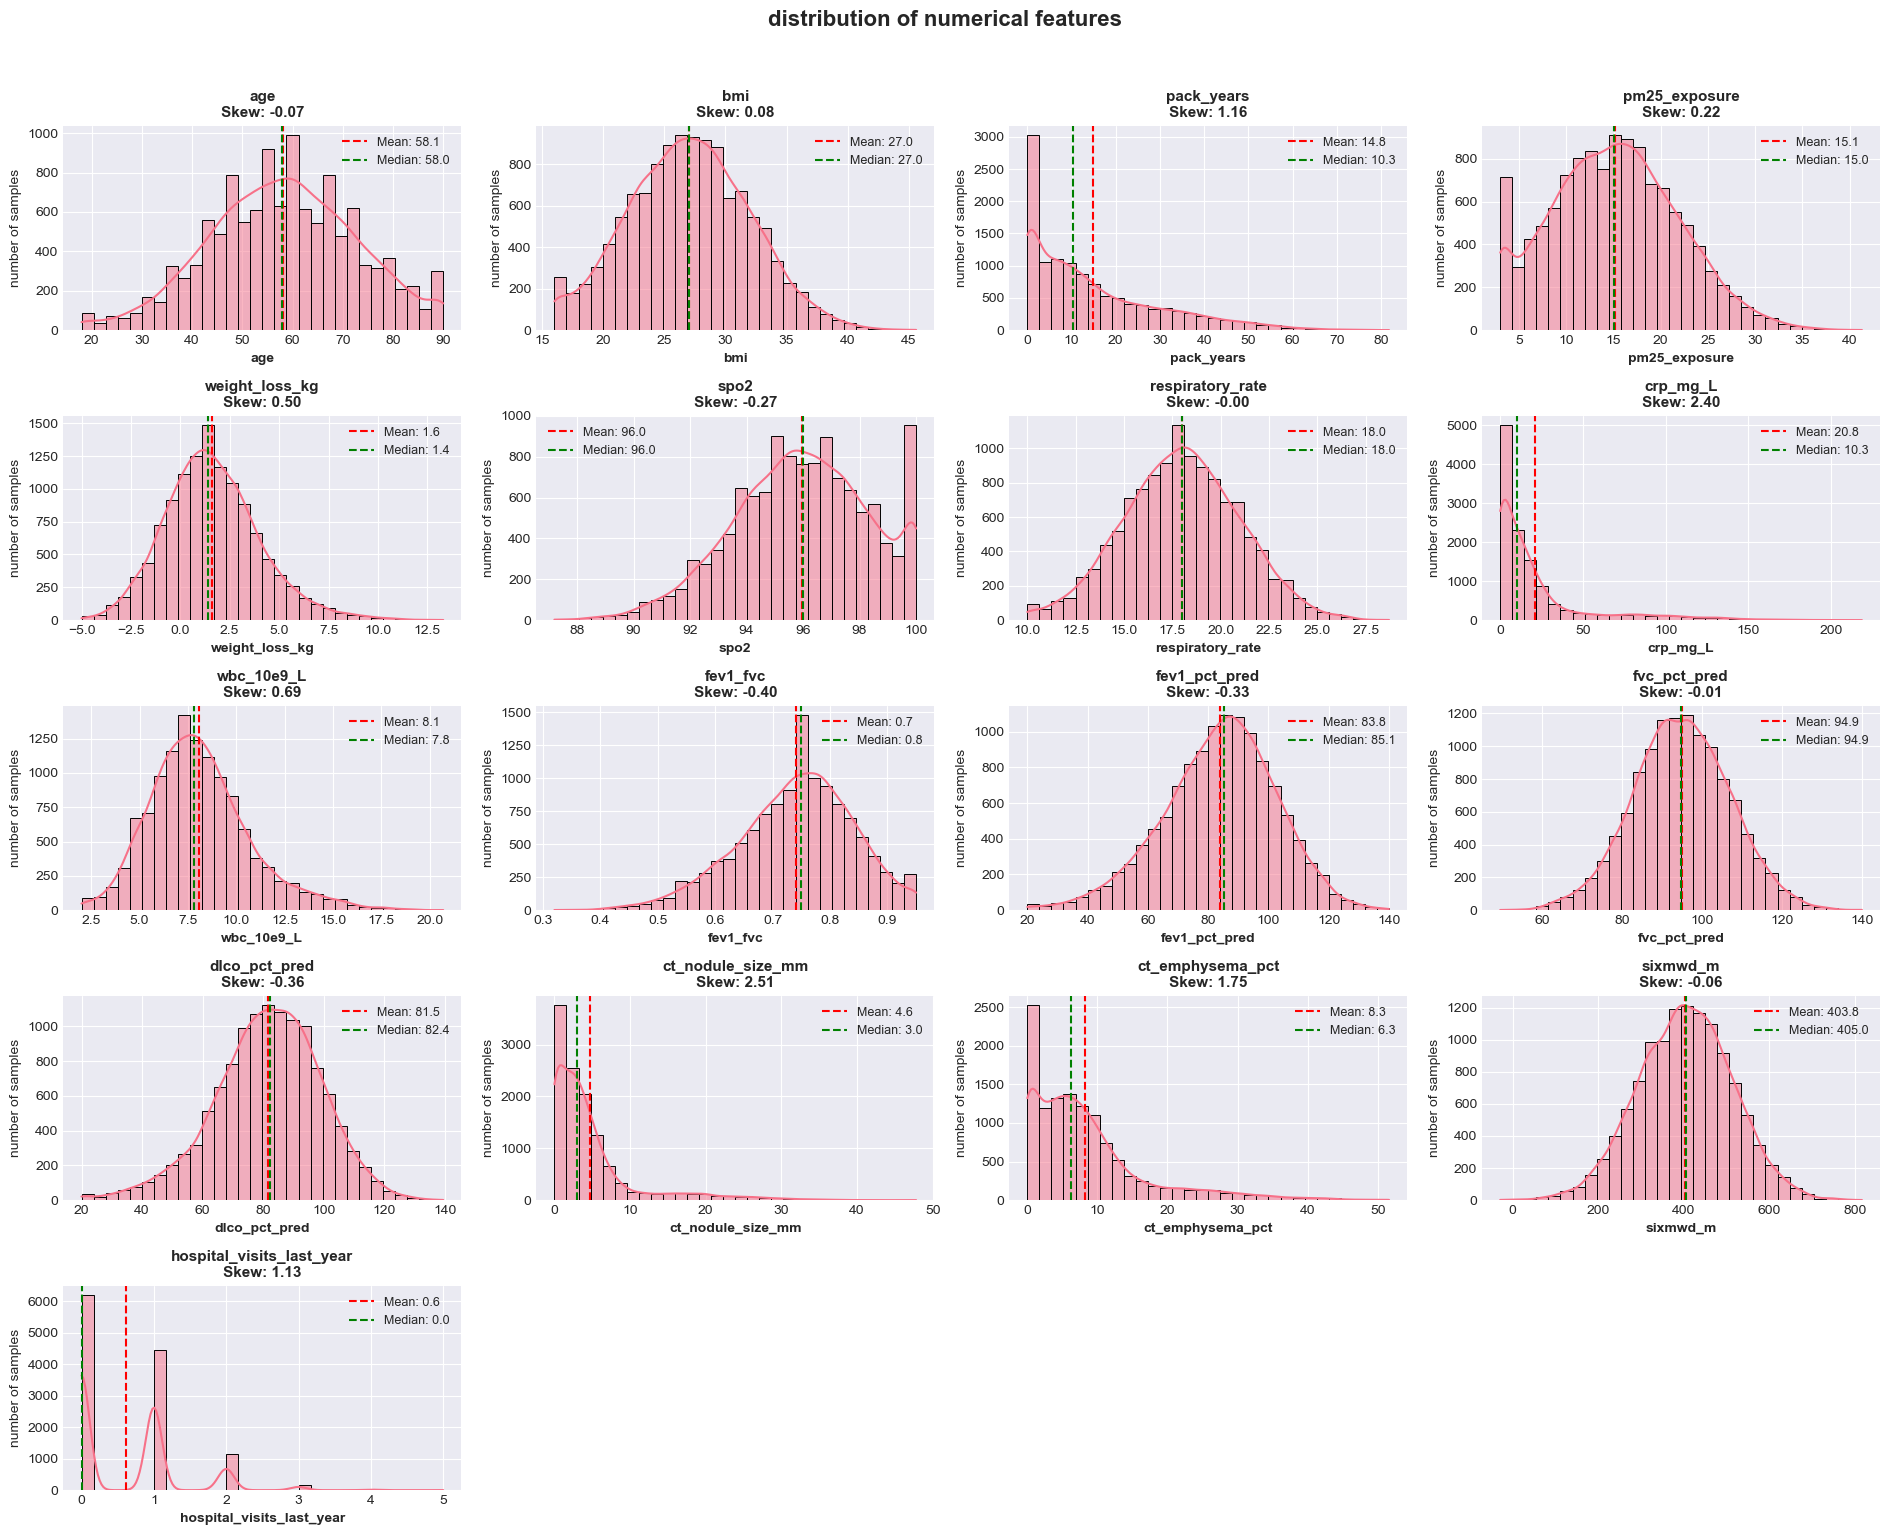

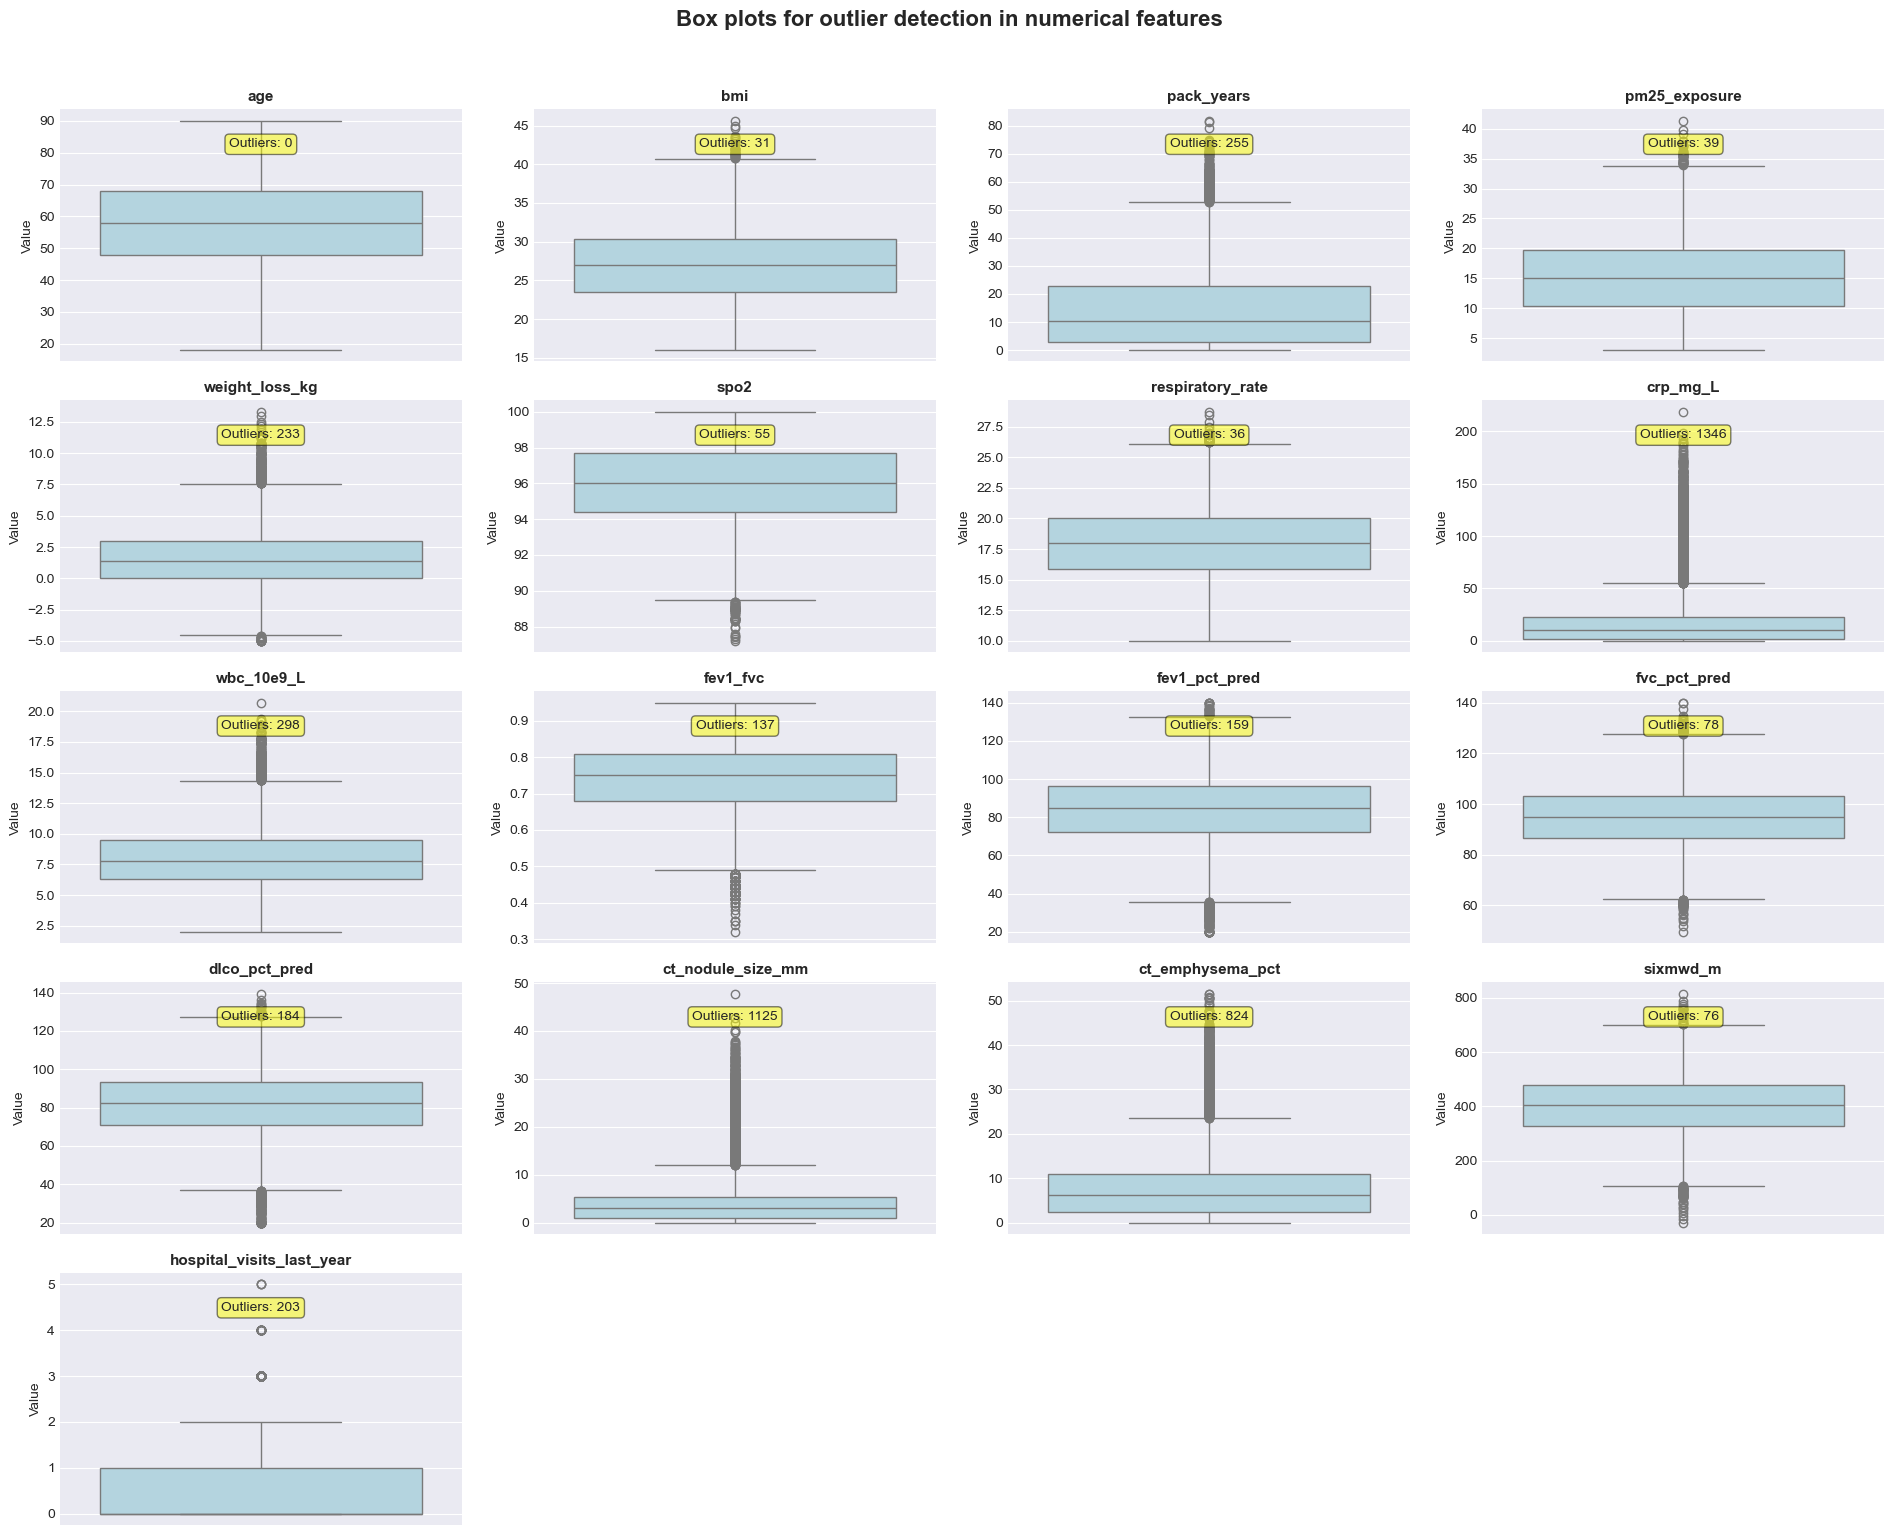

In [5]:
plt.figure(figsize=(19, 15))

for idx, feature in enumerate(Numerical_features):
    plt.subplot(5, 4, idx + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.axvline(df[feature].mean(), color='red', linestyle='--', label=f'Mean: {df[feature].mean():.1f}')
    plt.axvline(df[feature].median(), color='green', linestyle='--',label=f'Median: {df[feature].median():.1f}')
    plt.title(f'{feature}\nSkew: {df[feature].skew():.2f}', fontsize=11, fontweight='bold')
    plt.legend(fontsize = 9)
    plt.xlabel(f'{feature}', fontweight='bold')
    plt.ylabel('number of samples')
plt.suptitle('distribution of numerical features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
#plt.savefig('images/task1_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(19, 15))

for idx, feature in enumerate(Numerical_features):
    plt.subplot(5, 4, idx + 1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'{feature}', fontsize=11, fontweight='bold')
    plt.ylabel('Value')
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    plt.text(0.5, 0.85, f'Outliers: {len(outliers)}', transform= plt.gca().transAxes, ha='center',fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
plt.suptitle('Box plots for outlier detection in numerical features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
#plt.savefig('images/task1_outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

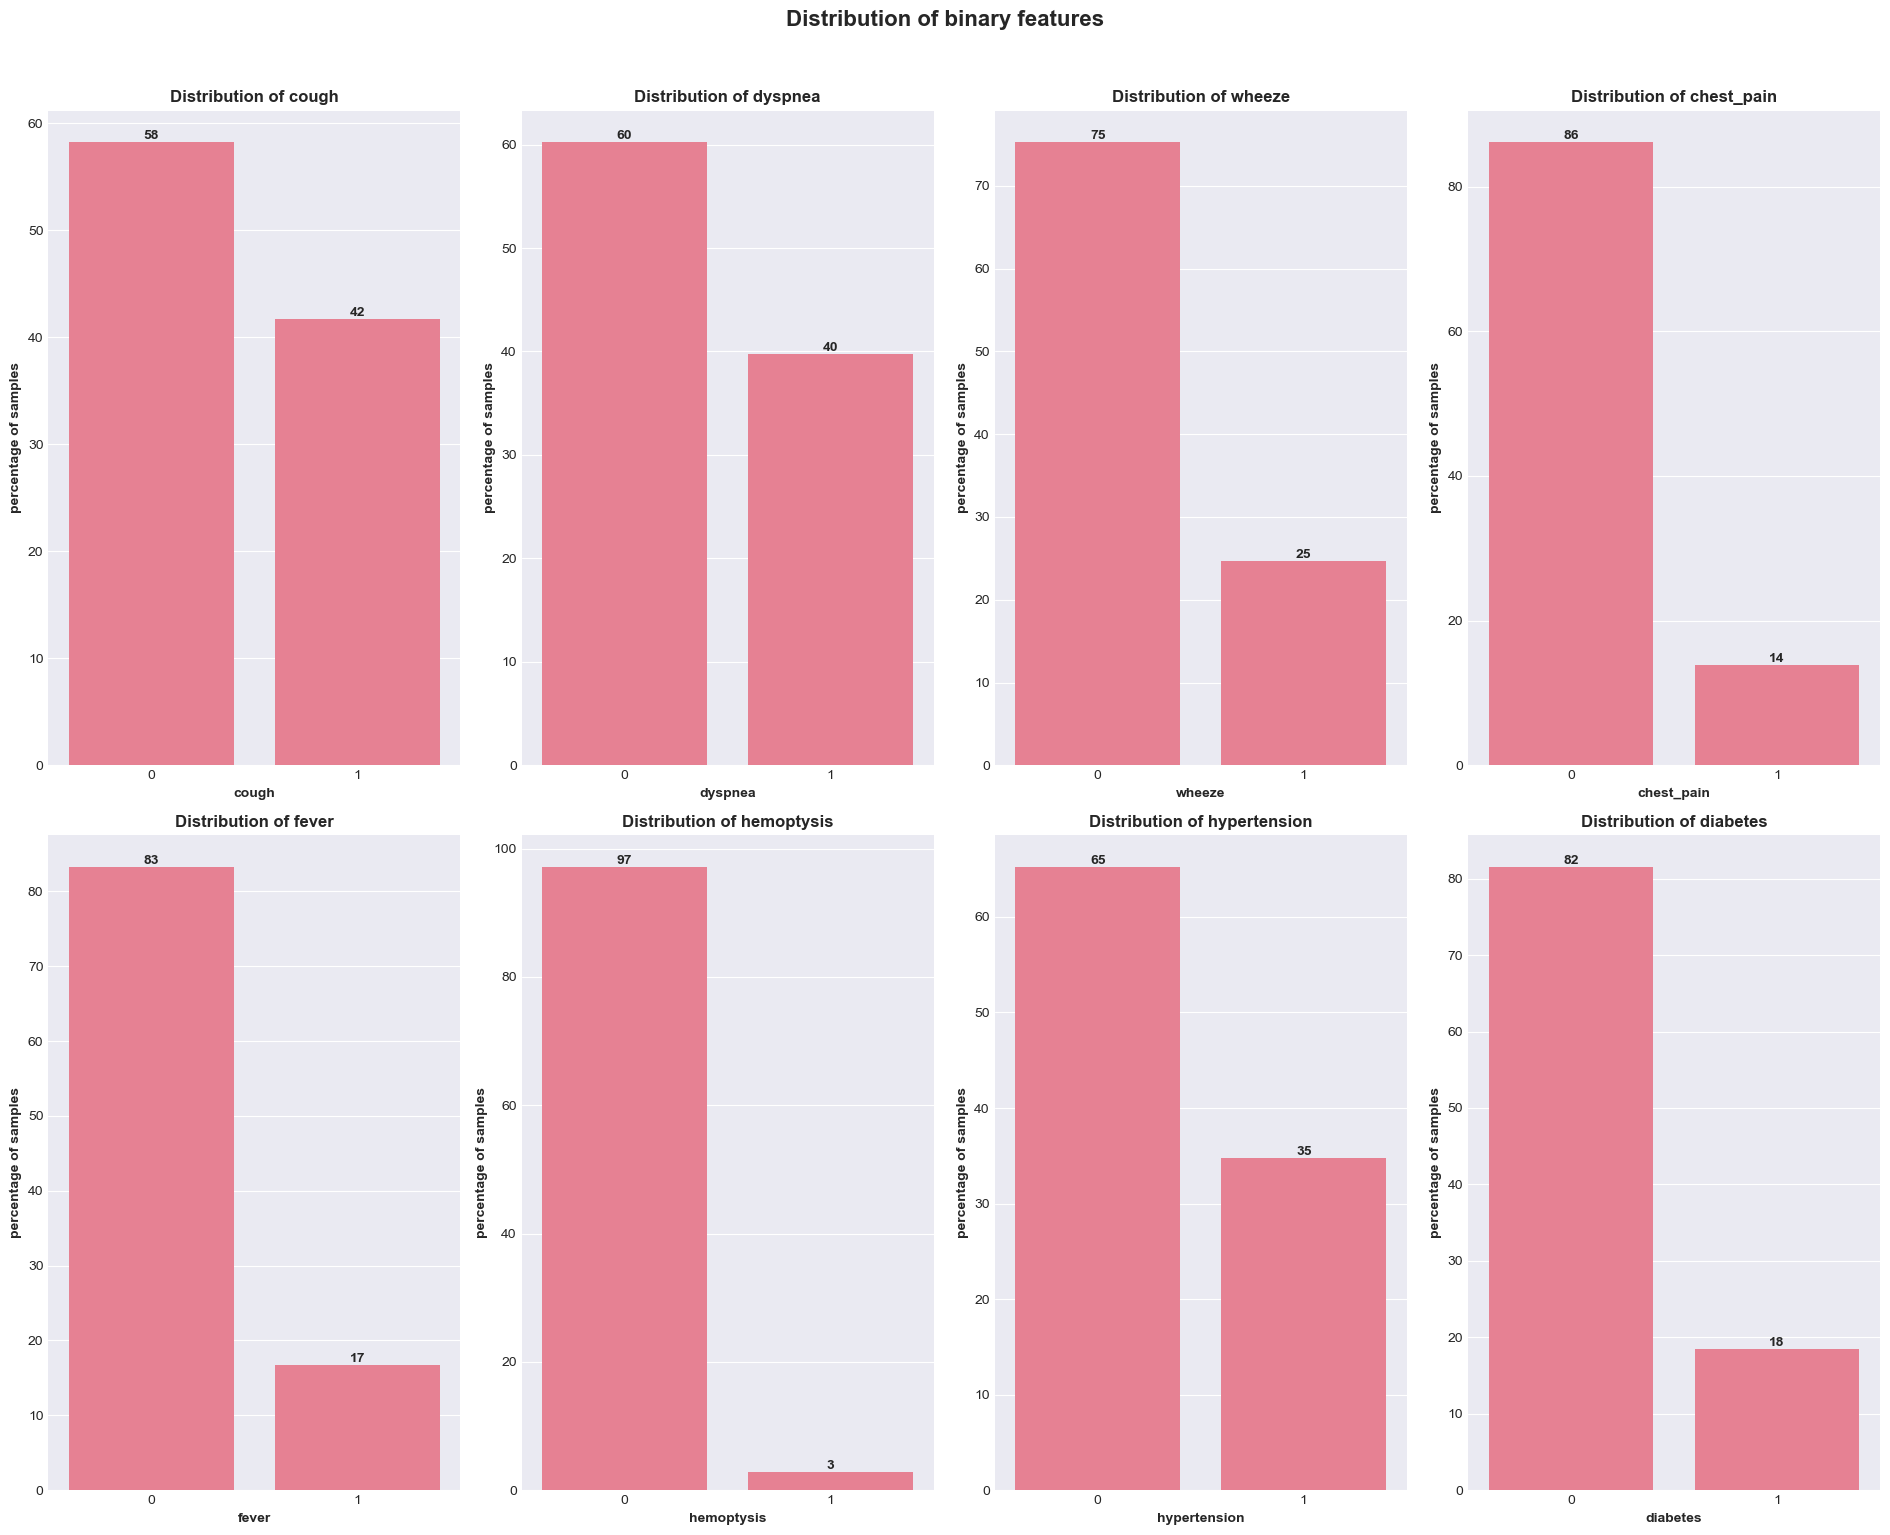

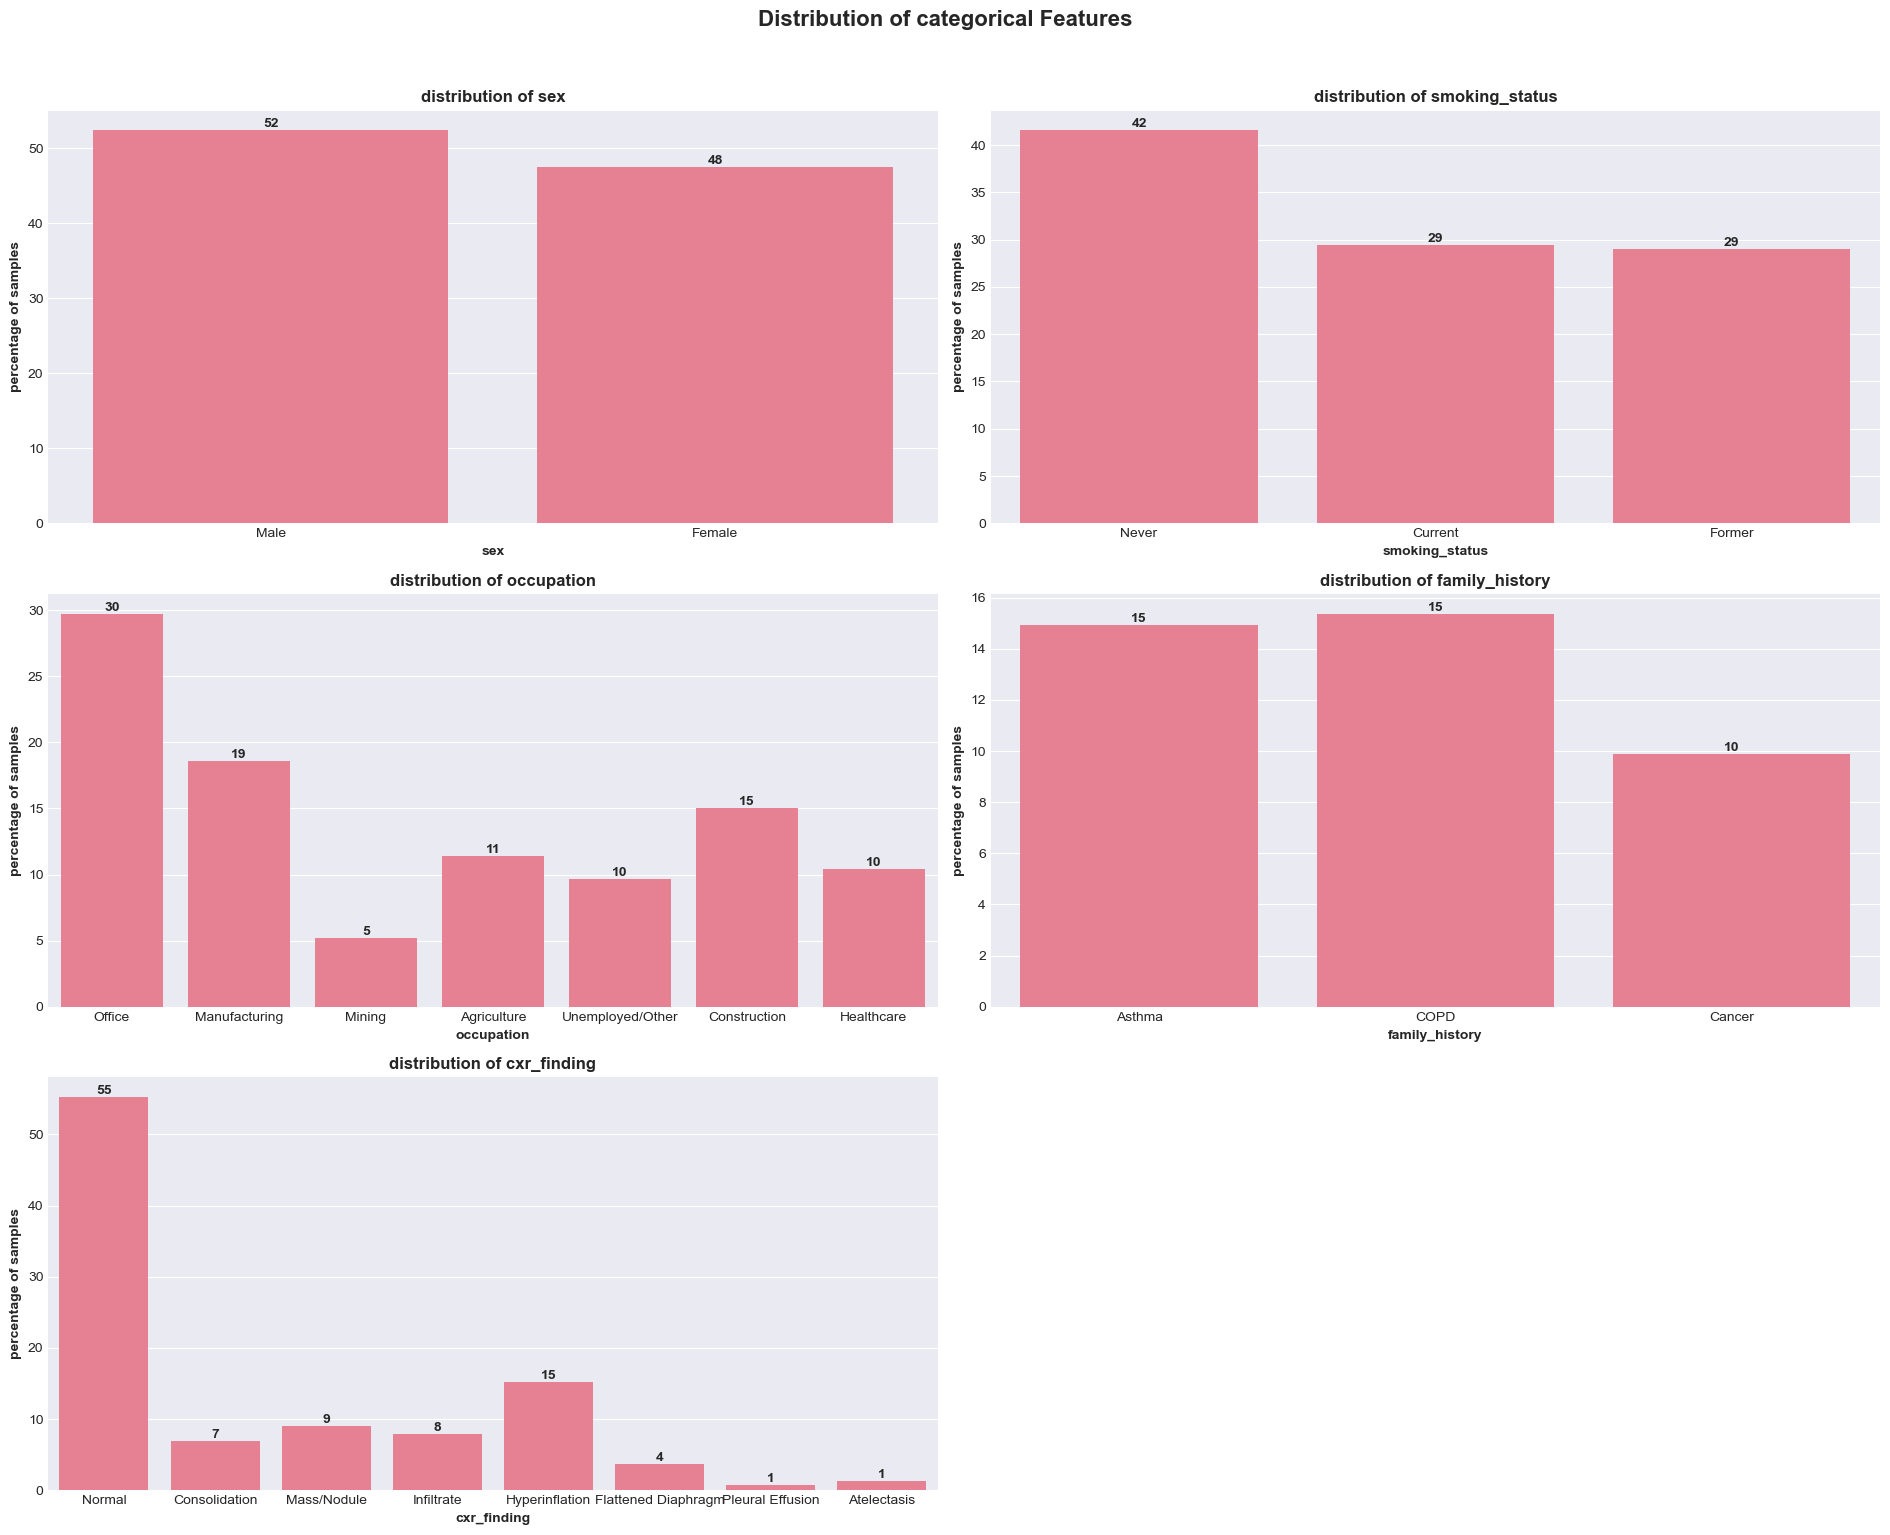

In [6]:
Binary_features = ['cough','dyspnea','wheeze','chest_pain','fever','hemoptysis','hypertension','diabetes']


plt.figure(figsize=(19, 15))  
for idx, feature in enumerate(Binary_features):
    ax = plt.subplot(2, 4, idx+1)  
    sns.countplot(x=df[feature], stat="percent", ax=ax)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontweight='bold')
    plt.title(f"Distribution of {feature}", fontweight="bold")
    plt.xlabel(feature, fontweight="bold") 
    plt.ylabel('percentage of samples', fontweight='bold')
plt.suptitle('Distribution of binary features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout() 
#plt.savefig('images/task1_binary_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


Categorical_features = ['sex' ,'smoking_status','occupation','family_history','cxr_finding']

plt.figure(figsize =(19,15))
for idx, features in enumerate(Categorical_features):
    ax = plt.subplot(3, 2, idx+1)
    sns.countplot(x=df[features], stat="percent", ax=ax)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f',fontweight ="bold")
    plt.title(f'distribution of {features}', fontweight ='bold')
    plt.xlabel(features, fontweight='bold')
    plt.ylabel('percentage of samples', fontweight ='bold')
plt.suptitle('Distribution of categorical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
#plt.savefig('images/task1_categorical_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

<h5>check for missing feature <h5>

In [7]:
my_features = Numerical_features + Categorical_features + Binary_features + ['disease_type','severity']
all_features = df.columns.to_list()

if (len(my_features)) == len(all_features[1:]): 
    print('all distributions has been plotted')
else:
    missing_features = [col for col in all_features if col not in my_features]
    print(f'add distributions for :{missing_features}')
    

all distributions has been plotted


<a id="correlation-results-with-target-variable"></a>
<h4>CORRELATION RESULTS WITH TARGET VARIABLE:</h4>

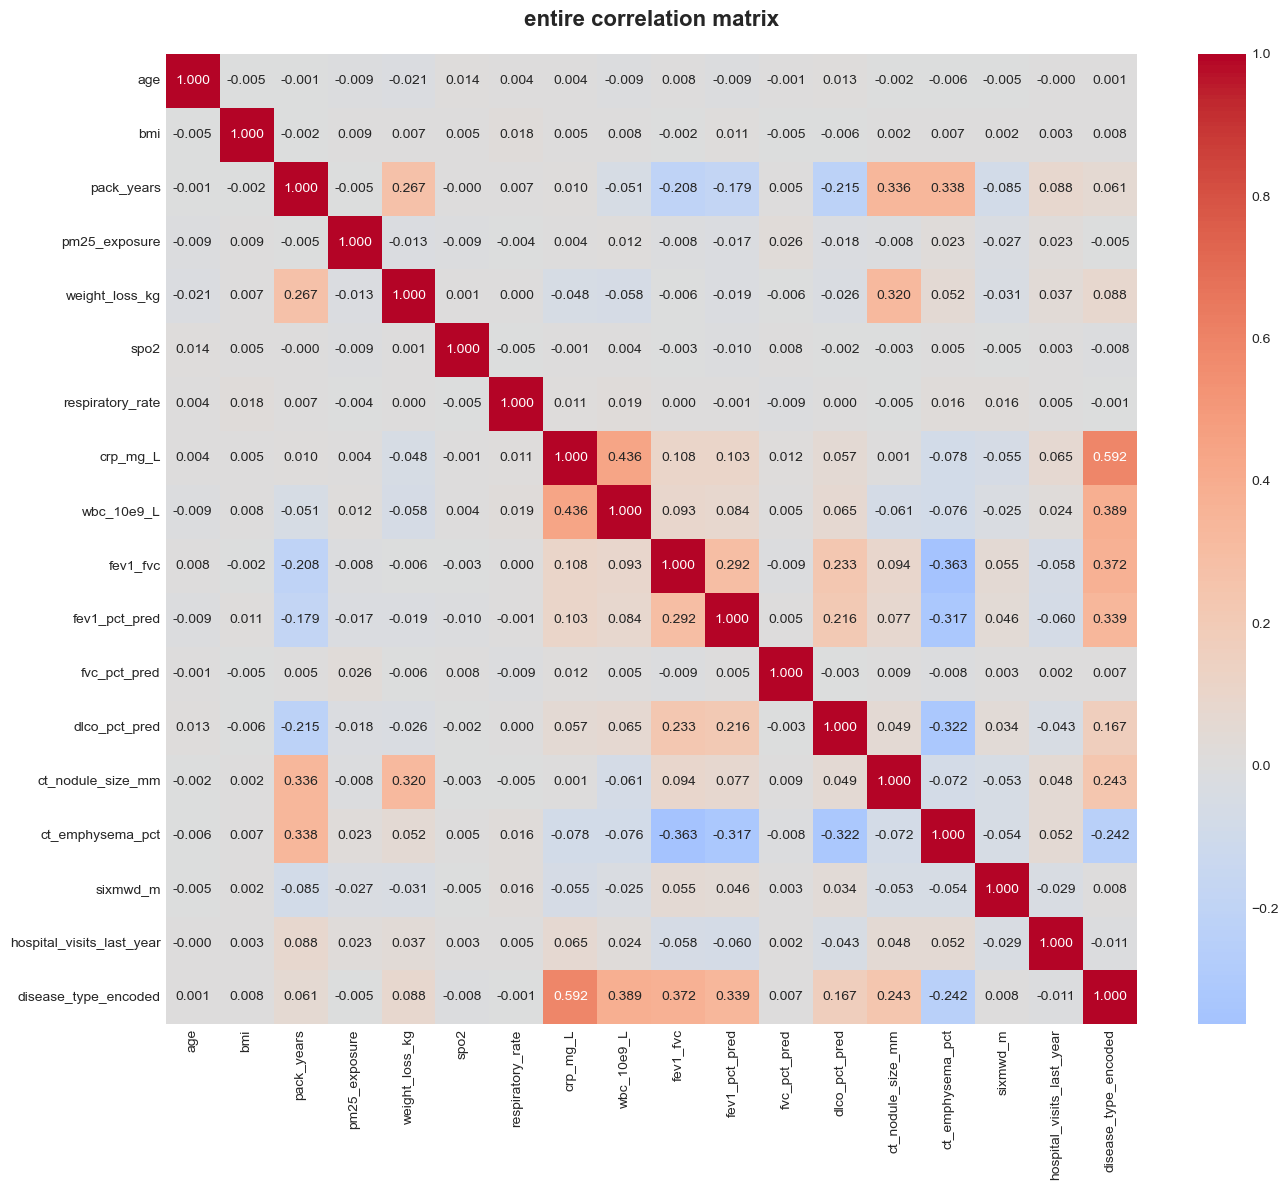

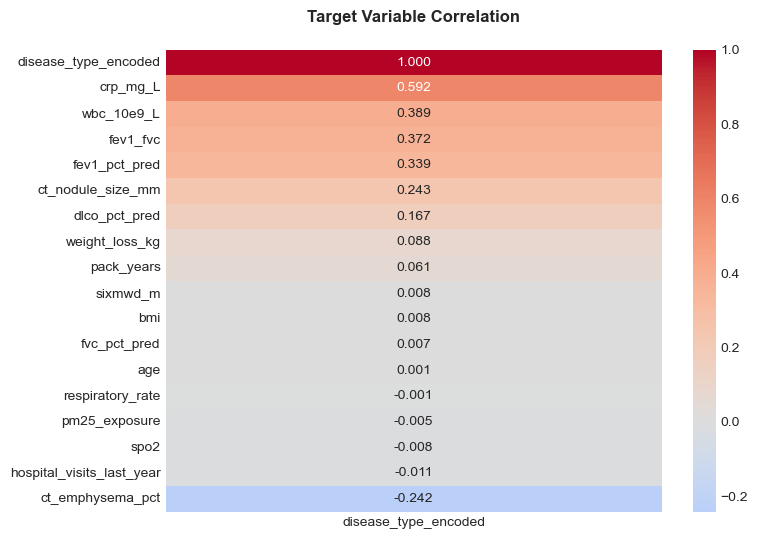

In [8]:
df_temp = df.copy()
le_disease = LabelEncoder()
df_temp['disease_type_encoded'] = le_disease.fit_transform(df_temp['disease_type'])


target_and_features = Numerical_features + ['disease_type_encoded']
correlation_matrix = df_temp[target_and_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('entire correlation matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

target_corr_df = pd.DataFrame(correlation_matrix['disease_type_encoded'].sort_values(ascending=False))
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr_df, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('Target Variable Correlation', fontsize=12, fontweight='bold', pad=20)
plt.savefig('images/task1_sorted_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="chapter-2-data-preparation"></a>
<h4>Task 2 DATA PREPARATION</h4>

<a id="missing-values-inspection"></a>
<h4>MISSING VALUES INSPECTION:</h4>

In [9]:

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values,'Percentage': missing_percent})
only_missing = missing_df[missing_df['Missing Values'] != 0]

final_table= only_missing.transpose()
display(final_table)
dfi.export(final_table, "images/Task2_missing_values_table.png", table_conversion='matplotlib')


,family_history
Missing Values,7176.0
Percentage,59.8


<a id="encoding-methods"></a>
<h4>ENCODING METHODS:</h4>

In [10]:



# 1. Target Encoding (Correct: LabelEncoder is for y)
le = LabelEncoder()
y_encoded = le.fit_transform(df['disease_type'])
X = df.drop(columns=['disease_type'])

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Identify features (Symmetric vs Skewed using Training Data 
skewness = X_train[Numerical_features].skew()
symmetric_features = skewness[abs(skewness) <= 0.75].index.tolist()
skewed_features = skewness[abs(skewness) > 0.75].index.tolist()


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_transformer = Pipeline([
    ('ord', OrdinalEncoder(categories=[['Mild/None', 'Moderate', 'Severe']]))
])

# 5. Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', RobustScaler(), symmetric_features),
        ('num_skew', PowerTransformer(), skewed_features),
        ('cat', categorical_transformer, Categorical_features),
        ('ord', ordinal_transformer, ['severity']),
        ('bin', 'passthrough', Binary_features)
    ],
    remainder='drop'
)

# 6. Final Execution
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [12]:
all_feature_names = preprocessor.get_feature_names_out()

# Create full DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

# Extract numerical features for plotting
# Symmetric features
sym_indices = [i for i, name in enumerate(all_feature_names) 
               if any(feat in name for feat in symmetric_features)]
X_train_processed_sym_df = pd.DataFrame(
    X_train_processed[:, sym_indices], 
    columns=symmetric_features
)

# Skewed features  
skew_indices = [i for i, name in enumerate(all_feature_names) 
                if any(feat in name for feat in skewed_features)]
X_train_processed_skew_df = pd.DataFrame(
    X_train_processed[:, skew_indices], 
    columns=skewed_features)

<a id="before-and-after-scaling-visualizations"></a>
<h4>BEFORE AND AFTER SCALING VISUALIZATIONS:</h4>

<a id="skewed-features"></a>
<h4>Skewed features :</h4>

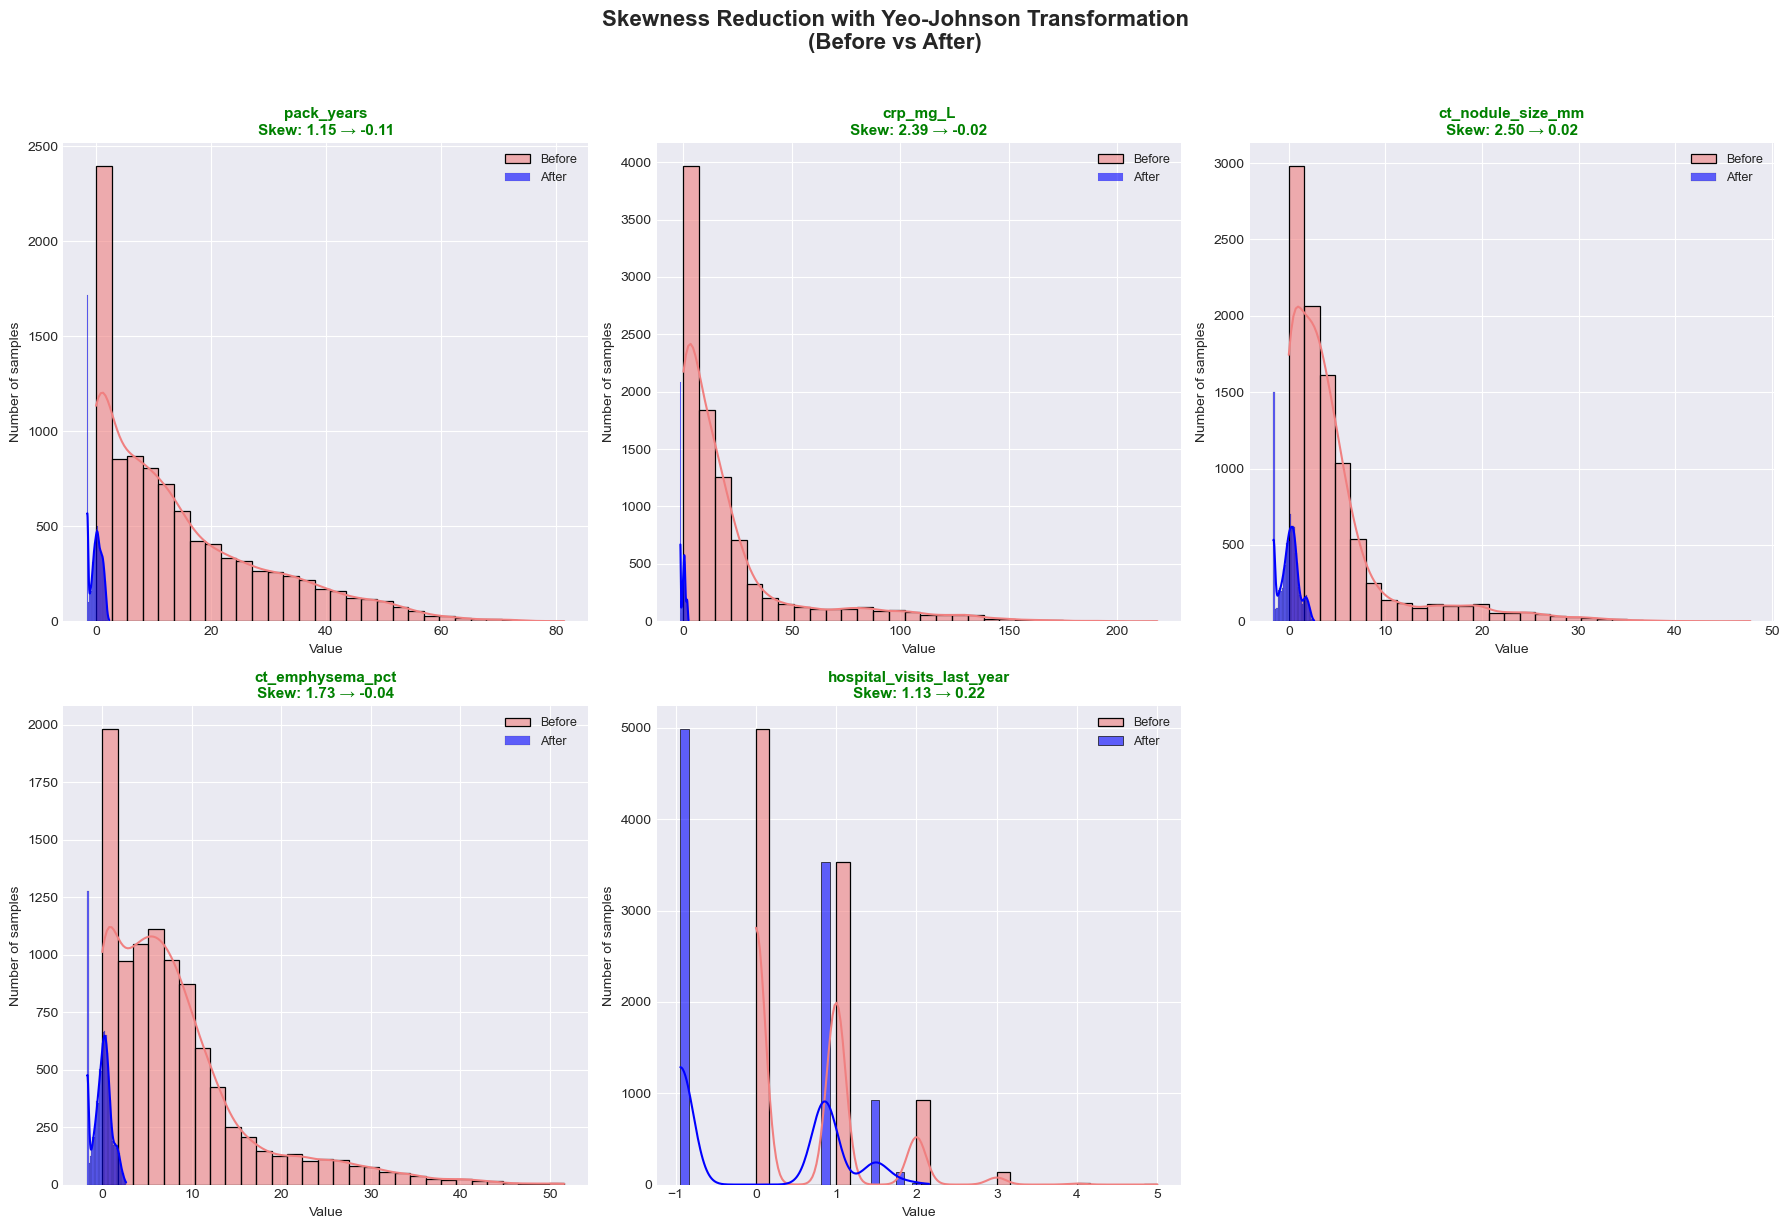

In [13]:
X_train_processed_skew_df

plt.figure(figsize=(18, 12))
for idx, feature in enumerate(skewed_features):
    plt.subplot(2, 3, idx + 1)
    
    # Plot histograms before and after
    sns.histplot(X_train[feature], kde=True, bins=30, color='lightcoral', alpha=0.6, label='Before')
    
    # Get the processed feature data
    feature_idx = skewed_features.index(feature) if feature in skewed_features else -1
    if feature_idx >= 0 and feature_idx < X_train_processed_skew_df.shape[1]:
        sns.histplot(X_train_processed_skew_df.iloc[:, feature_idx], kde=True, bins=30, color='blue', alpha=0.6, label='After')
    
    # Add skewness values
    before_skew = X_train[feature].skew()
    after_skew = X_train_processed_skew_df.iloc[:, feature_idx].skew()
    skew_text = f'Skew: {before_skew:.2f} → {after_skew:.2f}'
    color = 'green' if abs(after_skew) < abs(before_skew) else 'red'
    
    plt.title(f'{feature}\n{skew_text}', fontsize=11, fontweight='bold', color=color)
    plt.legend(fontsize=9)
    plt.xlabel('Value')
    plt.ylabel('Number of samples')

plt.suptitle('Skewness Reduction with Yeo-Johnson Transformation\n(Before vs After)',fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/task2_Skewness Reduction with Yeo-Johnson Transformation.png', dpi=300, bbox_inches='tight')
plt.show()

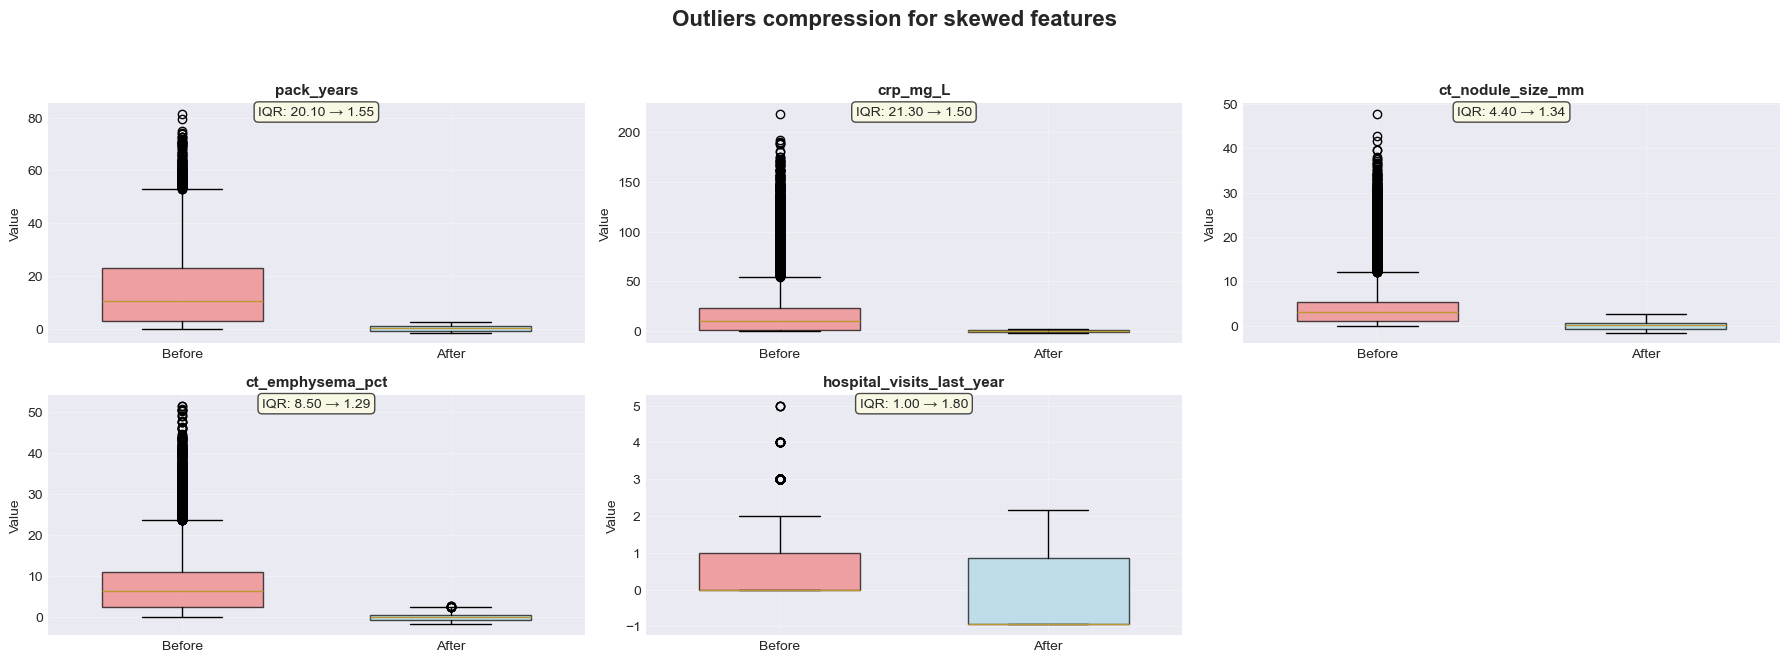

In [14]:
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(skewed_features): 
    plt.subplot(4, 3, idx + 1)

    # Create side-by-side box plots
    before_data = X_train[feature]
    feature_idx = skewed_features.index(feature) if feature in skewed_features else -1
    
    if feature_idx >= 0 and feature_idx < X_train_processed_skew_df.shape[1]:
        after_data = X_train_processed_skew_df.iloc[:, feature_idx]  
        
        # Combine data for boxplot
        data_to_plot = [before_data, after_data]
        bp = plt.boxplot(data_to_plot, patch_artist=True, widths=0.6, showfliers=True)
        
        # Color coding
        colors = ['lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # Statistics
        before_iqr = before_data.quantile(0.75) - before_data.quantile(0.25)
        after_iqr = after_data.quantile(0.75) - after_data.quantile(0.25)
        
        plt.xticks([1, 2], ['Before', 'After'])
        
        # Add IQR info
        plt.text(0.5, 0.95, f'IQR: {before_iqr:.2f} → {after_iqr:.2f}', 
                 transform=plt.gca().transAxes, ha='center', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
    else:
        # Handle case where feature wasn't found
        print(f"Warning: {feature} not found in processed data")
    
    plt.title(feature, fontsize=11, fontweight='bold')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

plt.suptitle('Outliers compression for skewed features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/task2_Outliers compression for skewed features.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="symmetric-features"></a>
<h4>Symmetric features :</h4>

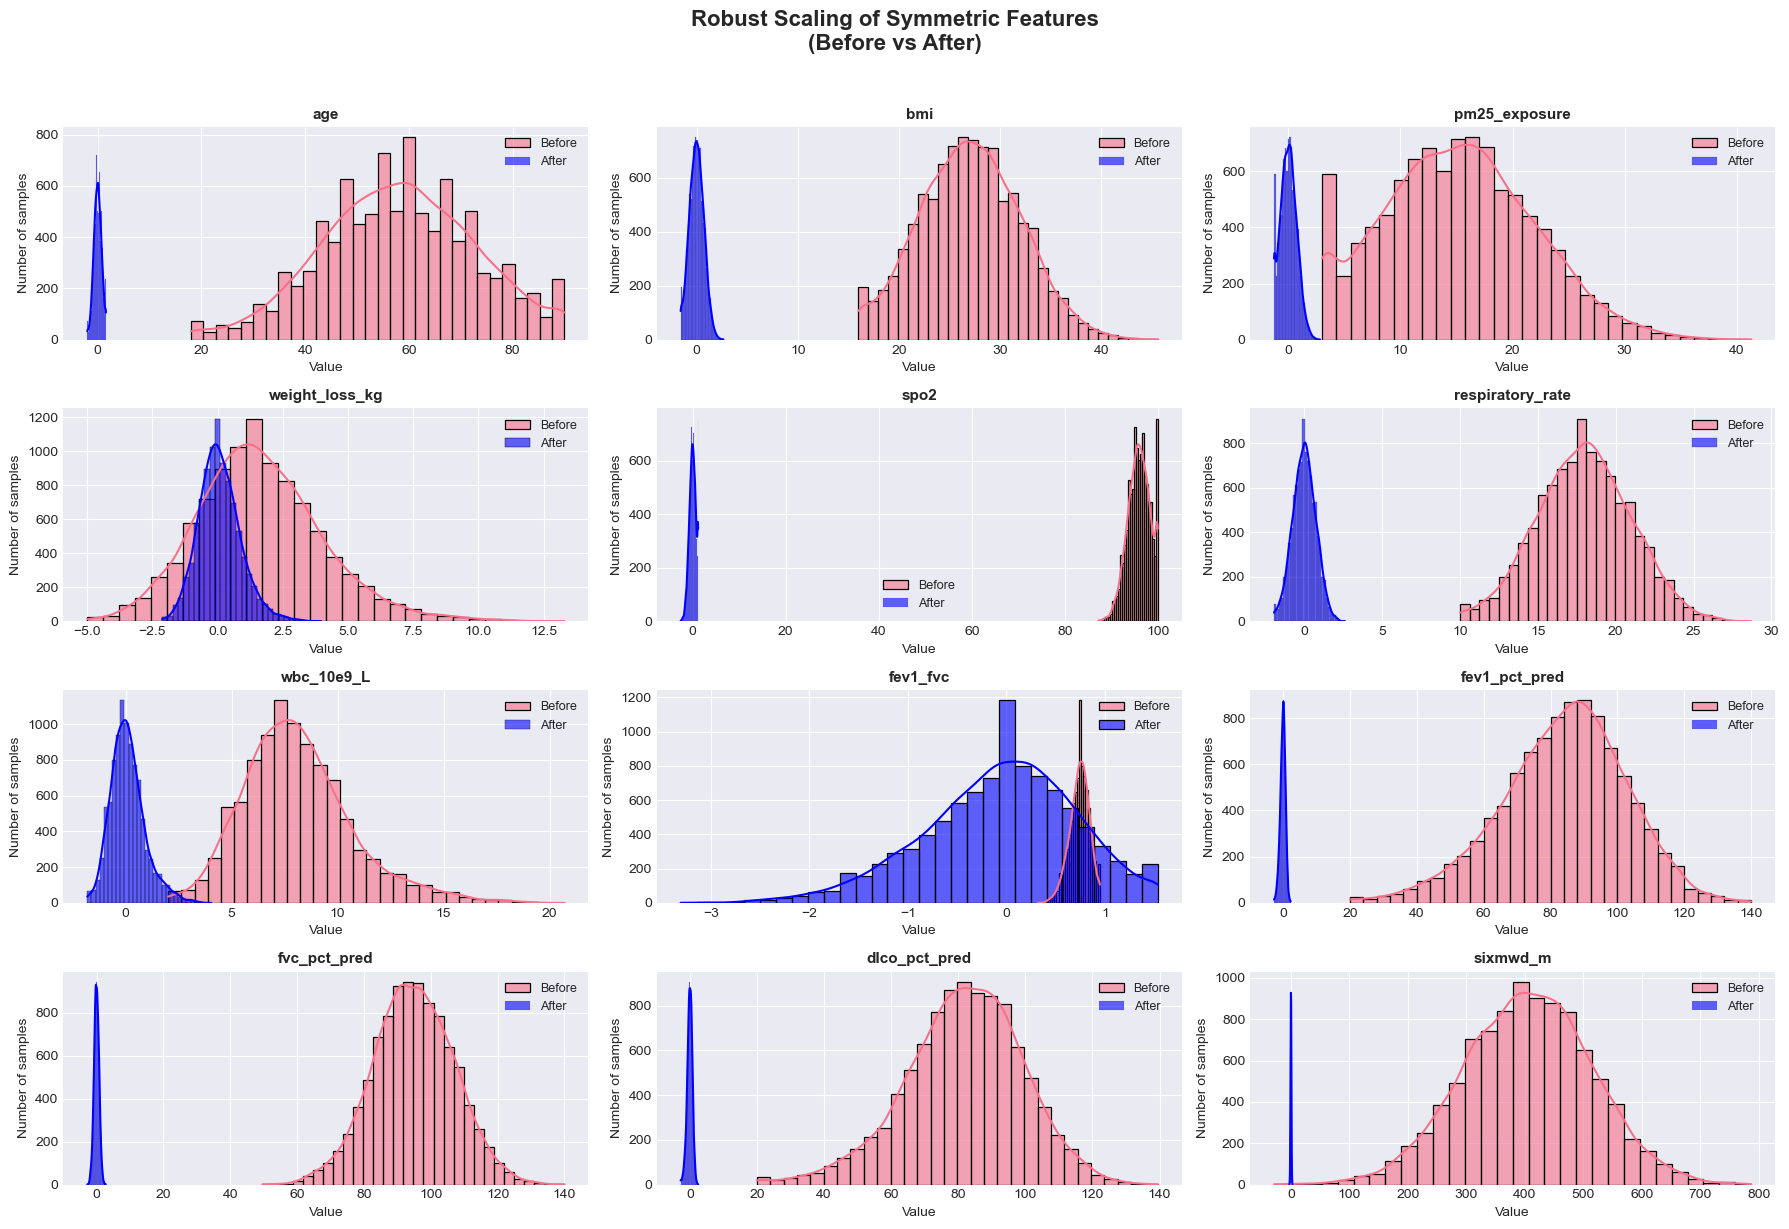

In [15]:
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(symmetric_features):  # Show symmetric features
    plt.subplot(4, 3, idx + 1)

    
    # Plot histograms before and after
    sns.histplot(X_train[feature], kde=True, bins=30, alpha=0.6, label='Before')

    # Get the processed feature data
    feature_idx = symmetric_features.index(feature)
    if feature_idx < X_train_processed_sym_df.shape[1]:
        sns.histplot(X_train_processed_sym_df.iloc[:, feature_idx], kde=True, bins=30, alpha=0.6, label='After', color='blue')
    
    plt.title(f'{feature}', fontsize=11, fontweight='bold')
    plt.legend(fontsize=9)
    plt.xlabel('Value')
    plt.ylabel('Number of samples')

# FIXED TITLE: These are symmetric features, NOT transformed with Yeo-Johnson
plt.suptitle('Robust Scaling of Symmetric Features\n(Before vs After)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/task2_Robust Scaling of Symmetric Features.png', dpi=300, bbox_inches='tight')
plt.show()

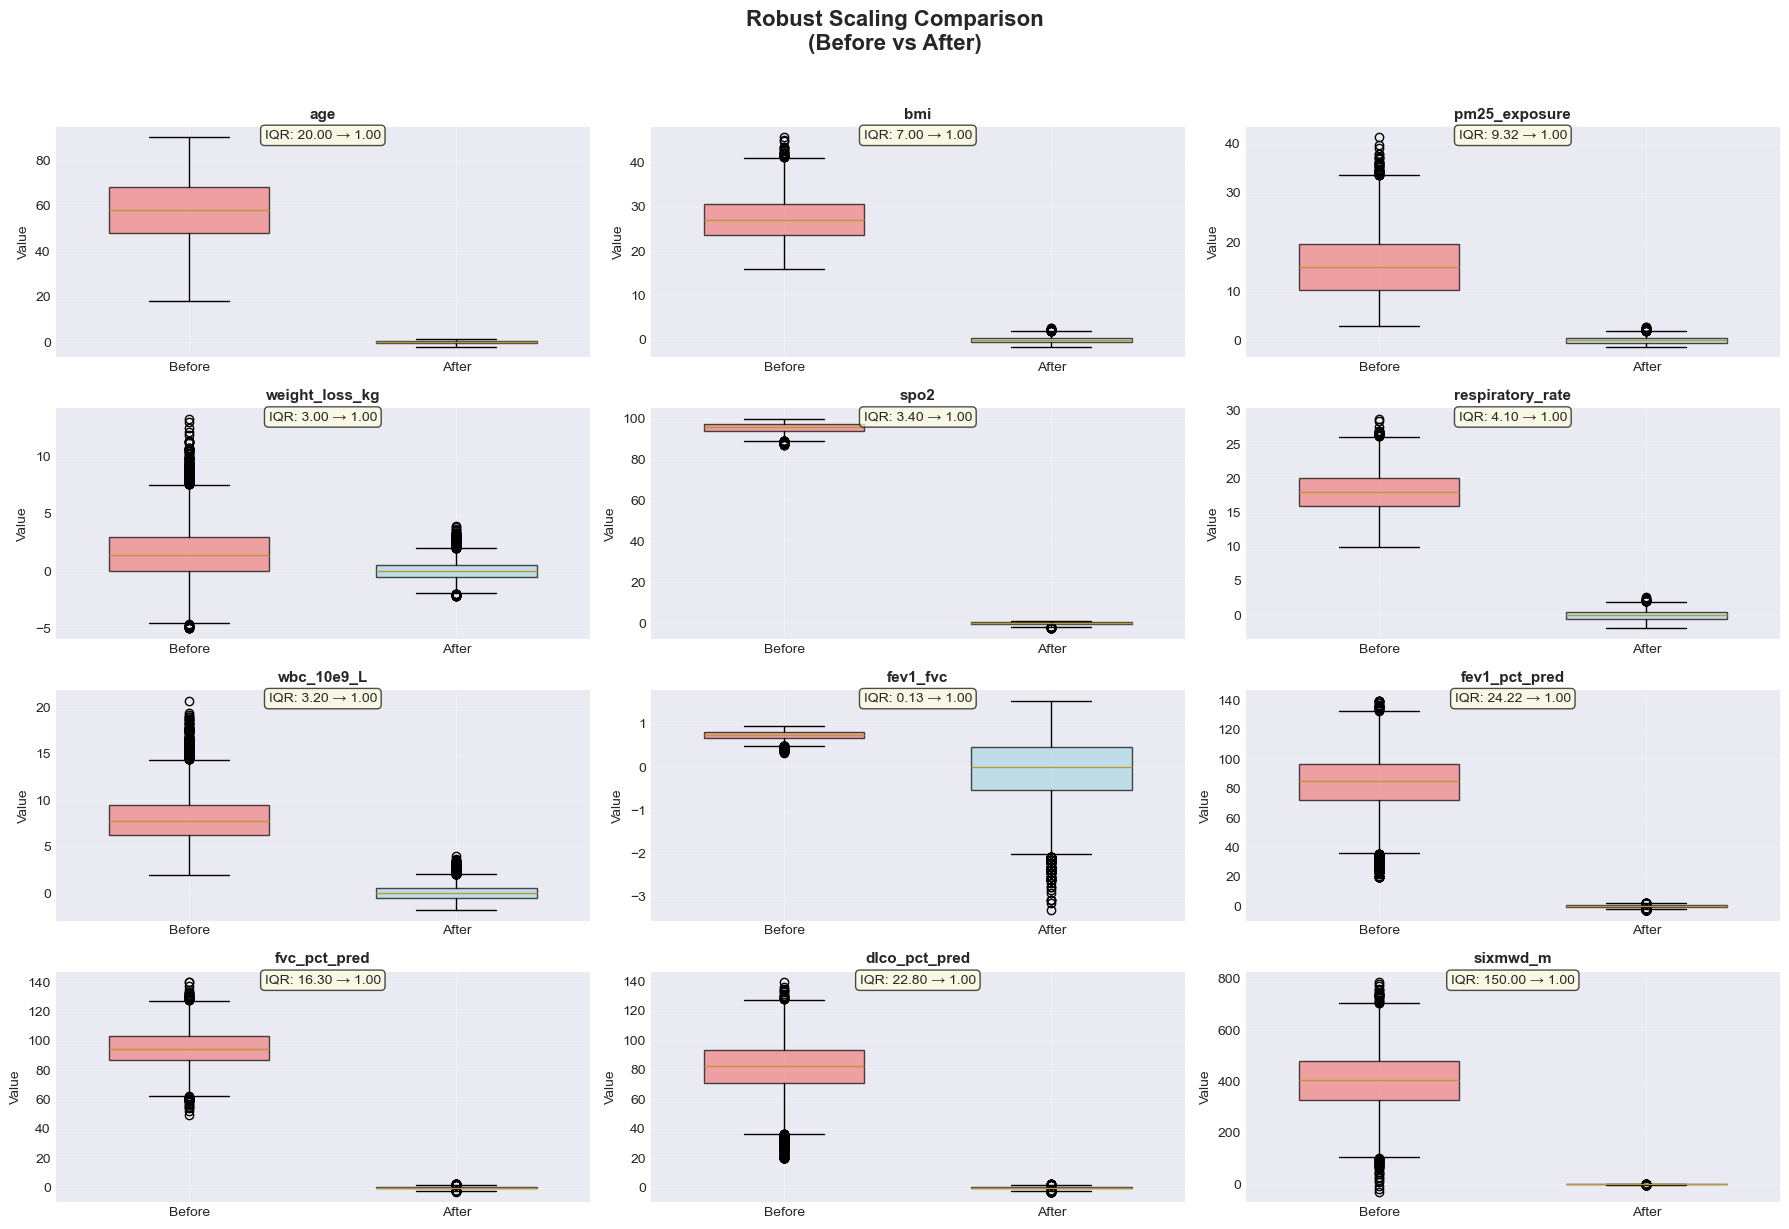

In [16]:
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(symmetric_features):  # Show first 6 symmetric features
    plt.subplot(4, 3, idx + 1)
    
    # Create side-by-side box plots
    before_data = X_train[feature]
    feature_idx = symmetric_features.index(feature) if feature in symmetric_features else -1
    
    if feature_idx >= 0 and feature_idx < X_train_processed_sym_df.shape[1]:
        after_data = X_train_processed_sym_df.iloc[:, feature_idx]  
        
        # Combine data for boxplot
        data_to_plot = [before_data, after_data]
        bp = plt.boxplot(data_to_plot, patch_artist=True, widths=0.6, showfliers=True)
        
        # Color coding
        colors = ['lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # Statistics
        before_iqr = before_data.quantile(0.75) - before_data.quantile(0.25)
        after_iqr = after_data.quantile(0.75) - after_data.quantile(0.25)
        
        plt.xticks([1, 2], ['Before', 'After'])
        
        # Add IQR info
        plt.text(0.5, 0.95, f'IQR: {before_iqr:.2f} → {after_iqr:.2f}', 
                 transform=plt.gca().transAxes, ha='center', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
    else:
        # Handle case where feature wasn't found
        print(f"Warning: {feature} not found in processed data")
    
    plt.title(feature, fontsize=11, fontweight='bold')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

plt.suptitle('Robust Scaling Comparison\n(Before vs After)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/task2_Robust Scaling compression.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="chapter-3-model-training"></a>
<h4>Task 3 MODEL TRAINING</h4>

In [17]:

# Dictionary to store models and their default hyperparameters
models = {}
model_params = {}

# 1. Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)  # increased max_iter for convergence
models['Logistic Regression'] = lr
model_params['Logistic Regression'] = lr.get_params()

# 2. Support Vector Machine
svm = SVC(random_state=42)
models['SVM'] = svm
model_params['SVM'] = svm.get_params()

# 3. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
models['Decision Tree'] = dt
model_params['Decision Tree'] = dt.get_params()

# 4. Random Forest
rf = RandomForestClassifier(random_state=42)
models['Random Forest'] = rf
model_params['Random Forest'] = rf.get_params()

# 5. K-Nearest Neighbors
knn = KNeighborsClassifier()
models['KNN'] = knn
model_params['KNN'] = knn.get_params()


# Train all models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_processed, y_train)
    trained_models[name] = model

# Display initial hyperparameters (first few key ones for brevity in report)
print("\n" + "="*60)
print("DEFAULT HYPERPARAMETERS (selected key params):")
print("="*60)

for name, params in model_params.items():
    print(f"\n{name}:")
    if name == 'Logistic Regression':
        print(f"  penalty: {params['penalty']}")
        print(f"  C: {params['C']}")
        print(f"  solver: {params['solver']}")
    elif name == 'SVM':
        print(f"  kernel: {params['kernel']}")
        print(f"  C: {params['C']}")
        print(f"  gamma: {params['gamma']}")
    elif name == 'Decision Tree':
        print(f"  max_depth: {params['max_depth']}")
        print(f"  min_samples_split: {params['min_samples_split']}")
    elif name == 'Random Forest':
        print(f"  n_estimators: {params['n_estimators']}")
        print(f"  max_depth: {params['max_depth']}")
    elif name == 'KNN':
        print(f"  n_neighbors: {params['n_neighbors']}")
        print(f"  weights: {params['weights']}")


Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training KNN...

DEFAULT HYPERPARAMETERS (selected key params):

Logistic Regression:
  penalty: l2
  C: 1.0
  solver: lbfgs

SVM:
  kernel: rbf
  C: 1.0
  gamma: scale

Decision Tree:
  max_depth: None
  min_samples_split: 2

Random Forest:
  n_estimators: 100
  max_depth: None

KNN:
  n_neighbors: 5
  weights: uniform


<a id="chapter-4-model-evaluation-and-visualization"></a>
<h4>Task 4 MODEL EVALUATION AND VISUALIZATION:</h4>

<a id="model-evaluation"></a>
<h4>MODEL EVALUATION:</h4>


<a id="performance-metrics"></a>
<h4>Performance metrics:</h4>

In [ ]:


# Get number of classes
#n_classes = len(label_encoder.classes_)
n_classes = len(le.classes_)

# Initialize results dictionary
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test_processed)
    
    # For multiclass, use 'macro' averaging (treats all classes equally)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Handle ROC AUC: only if we can get prediction probabilities
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_processed)
            # Binarize y_test for multiclass ROC
            y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
            roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro')
        else:
            # For models like SVM without probability (by default), skip or use decision_function
            if name == 'SVM':
                svm_model = OneVsRestClassifier(SVC(probability=True, random_state=42))
                svm_model.fit(X_train_processed, y_train)
                y_proba = svm_model.predict_proba(X_test_processed)
                y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
                roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro')
            else:
                roc_auc = np.nan
    except:
        roc_auc = np.nan

    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (macro)': prec,
        'Recall (macro)': rec,
        'F1-score (macro)': f1,
        'ROC AUC (macro)': roc_auc
    })



# Create results DataFrame
results_df = pd.DataFrame(results).round(3)
results_df = results_df.sort_values('F1-score (macro)', ascending=False)
display(results_df)
dfi.export(results_df, 'images/task4_performance metrics table.png', table_conversion='matplotlib')


<a id="confusion-matrix"></a>
<h4>Confusion Matrix:</h4>

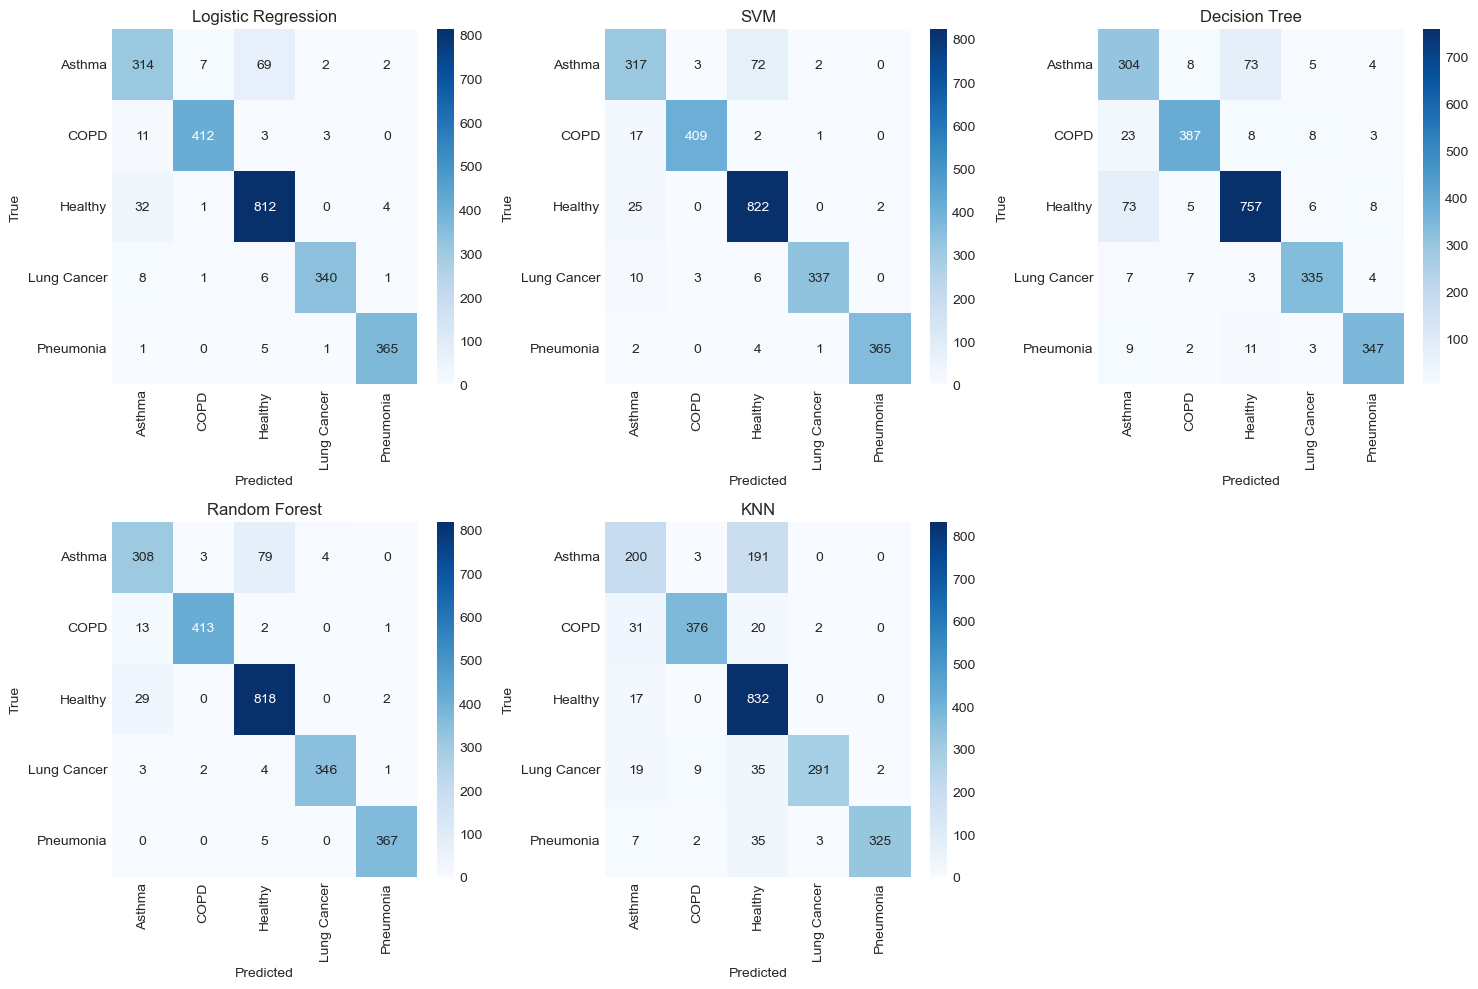

In [54]:

plt.figure(figsize=(15, 10))

for idx, (name, model) in enumerate(trained_models.items()):
    
    y_pred = model.predict(X_test_processed)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, idx + 1)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.savefig('images/task4_confusion matrix models.png', dpi=300, bbox_inches='tight')
plt.show()


<a id="multiclass-roc-curves"></a>
<h4>Multiclass Roc curves:</h4>

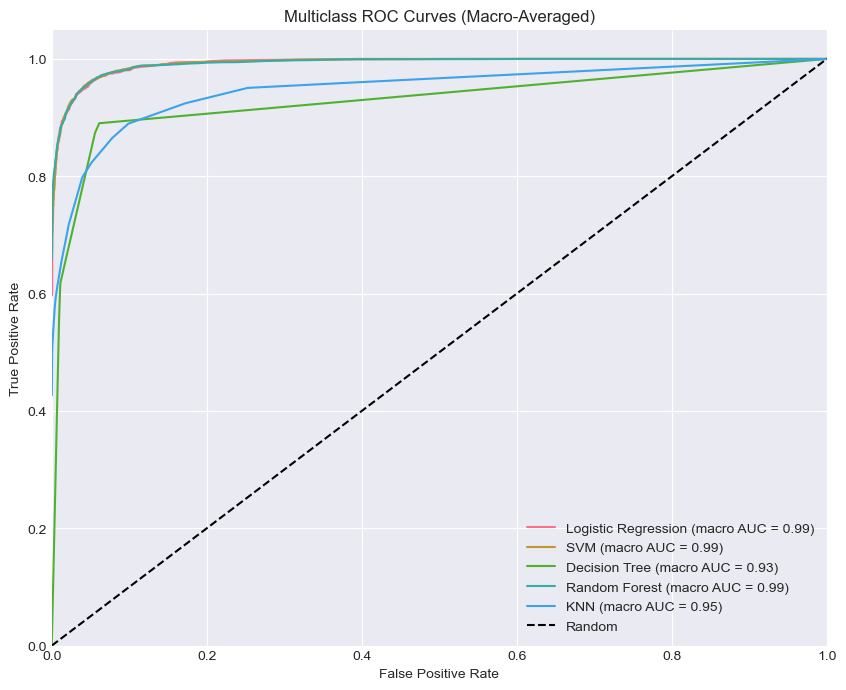

In [60]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_processed)
    elif name == 'SVM':
        # Re-train SVM with probability=True for ROC
        svm_roc = SVC(probability=True, random_state=42)
        svm_roc.fit(X_train_processed, y_train)
        y_proba = svm_roc.predict_proba(X_test_processed)
    else:
        continue  # Skip models without probability

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr,
             label=f'{name} (macro AUC = {roc_auc["macro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (Macro-Averaged)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('images/task4_multiclass roc curves.png', dpi=300, bbox_inches='tight')
plt.show()

<a id="model-performance-after-tuning"></a>
<h4>MODEL PERFORMANCE AFTER TUNING</h4>

In [19]:
# Select best model (e.g., Random Forest)
best_model_name = results_df.iloc[0]['Model']
print(f"Best model (pre-tuning): {best_model_name}")

if best_model_name == 'Random Forest':
    rf = RandomForestClassifier(random_state=42)
    param_dist = {
        'n_estimators': randint(100, 500),
        'max_depth': [None] + list(range(5, 31, 5)),
        'min_samples_split': randint(2, 21),
        'min_samples_leaf': randint(1, 11),
        'max_features': ['sqrt', 'log2', None]
    }
    search = RandomizedSearchCV(
        rf, param_distributions=param_dist,
        n_iter=50, cv=5, scoring='f1_macro',
        n_jobs=-1, random_state=42, verbose=1
    )
else:
    # Fallback: tune Random Forest anyway
    rf = RandomForestClassifier(random_state=42)
    param_dist = { ... }  # same as above
    search = RandomizedSearchCV(rf, param_dist, ...)

# Perform tuning
print("Tuning best model...")
search.fit(X_train_processed, y_train)

# Get best model
best_model_tuned = search.best_estimator_
print("Best parameters:", search.best_params_)

Best model (pre-tuning): Random Forest
Tuning best model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 394}


In [21]:
# Predict with tuned model
y_pred_tuned = best_model_tuned.predict(X_test_processed)

# Metrics for tuned model
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned, average='macro')
rec_tuned = recall_score(y_test, y_pred_tuned, average='macro')
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro')

# Get original metrics for same model
original_metrics = results_df[results_df['Model'] == best_model_name].iloc[0]

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)'],
    'Before Tuning': [
        original_metrics['Accuracy'],
        original_metrics['Precision (macro)'],
        original_metrics['Recall (macro)'],
        original_metrics['F1-score (macro)']
    ],
    'After Tuning': [acc_tuned, prec_tuned, rec_tuned, f1_tuned]
})
display(comparison.round(3))
dfi.export(comparison.round(3),'images/task4_model after tuning.png', table_conversion='matplotlib')


,Metric,Before Tuning,After Tuning
0,Accuracy,0.938,0.942
1,Precision (macro),0.948,0.953
2,Recall (macro),0.933,0.935
3,F1-score (macro),0.940,0.942


<a id="feature-important-shap-method"></a>
<h4>FEATURE IMPORTANT SHAP METHOD:</h4>

In [ ]:
if best_model_name in ['Random Forest', 'Decision Tree']:
    explainer = shap.TreeExplainer(best_model_tuned)
    # Use a sample of test data for speed
    X_test_sample = X_test_processed
    shap_values = explainer.shap_values(X_test_sample)
    
    # Plot feature importance (mean |SHAP|)
    plt.figure(figsize=(10, 6))
    if n_classes > 2:
        # For multiclass, shap_values is a list — take mean across classes
        shap.summary_plot(shap_values, X_test_sample, 
                          feature_names=preprocessor.get_feature_names_out(),
                           max_display=10 ,plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, X_test_sample, 
                          feature_names=preprocessor.get_feature_names_out(),
                          max_display=10, show=False)
    plt.title("SHAP Feature Importance (Top 10)")
    plt.tight_layout()
    plt.savefig('images/task4_important features SHAP visualisation.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("SHAP TreeExplainer only supports tree-based models. Try with Random Forest or XGBoost.")